# Introduction to Neural Nets

### Learning Objectives:

After doing this Colab, you'll know how to do the following:

- Create a simple deep neural network.
- Tune the hyperparameters for a simple deep neural network.

Vamos a seguir usando el California Housing dataset

In [25]:
#@title Run on TensorFlow 2.x

from __future__ import absolute_import, division, print_function, unicode_literals

In [14]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 10
pd.options.display.float_format="{:.1f}".format

print("imported modules")

imported modules


In [15]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

train_df = train_df.reindex(np.random.permutation(train_df.index))

print("datasets cargados")

datasets cargados


Ahora tenemos que normalizar los valores para que sea mejor y mas facil tratarlos. Especialmente en grandes datasets

In [16]:
# Calculate the Z-scores of each column in the training set:
train_df_mean = train_df.mean()
train_df_std = train_df.std()
train_df_norm = (train_df - train_df_mean)/train_df_std

# Y ahora lo mismo con los del test data set
test_df_mean = test_df.mean()
test_df_std = test_df.std()
test_df_norm = (test_df - test_df_mean)/test_df_std

print("Valores normalizados")


Valores normalizados


#### Represent Data

Ahora vamos a crear un feature layer que contenga las tres features que queremos que tenga en cuenta el modelo: latitudeXlongitude(feature cross), median_income y population

In [17]:
feature_columns = []
resolution = 0.3

# Primero creamos ambas features como feature bucketizeds con train_df_norm ¡! porque es mas facil tratar los datos así.
latitude_as_numeric = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df_norm['latitude'])),
                                    int(max(train_df_norm['latitude'])),
                                    resolution))
latitude = tf.feature_column.bucketized_column(latitude_as_numeric, latitude_boundaries)


longitude_as_numeric = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df_norm['longitude'])),
                                    int(max(train_df_norm['longitude'])),
                                    resolution))
longitude = tf.feature_column.bucketized_column(longitude_as_numeric, longitude_boundaries)

# Ahora vamos a crear la feature cross entre ambas. Cuidado no poner solo latitude_x_longitude hay que crear lo de specificator
latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)

# Y añadimos esta a feature_columns porque es la que queremos utilizar, el cruce de ambas, ya que es mas relevante.
feature_columns.append(crossed_feature)

# Ahora añadimos el median_income como float value y population

median_income = tf.feature_column.numeric_column("median_income")
feature_columns.append(median_income)

population = tf.feature_column.numeric_column("population")
feature_columns.append(population)

# Ahora creamos el layer por el que pasaran los datos
my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

print("layer creado con exito")

layer creado con exito


### Build A Linear Regresssion Model Como base

In [18]:
def build_model(my_learning_rate, feature_layer):
    
    model = tf.keras.models.Sequential()
    
    model.add(feature_layer)
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
    
    model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                 loss="mean_squared_error",
                 metrics=[tf.keras.metrics.MeanSquaredError()])
    
    return model

def train_model (model, df, epochs, batch_size, label_name):
    
    features = {name:np.array(value) for name, value in df.items()}
    label = np.array(features.pop(label_name))
    
    history = model.fit(x=features, y=label, batch_size=batch_size, epochs=epochs, shuffle=True)
    
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    rmse = hist["mean_squared_error"]
    
    return epochs, rmse

def test_model(model, df, batch_size, label_name):
    
    features = {name:np.array(value) for name, value in df.items()}
    label = np.array(features.pop(label_name))
    
    print("\n Evaluate the linear regression model against the test set:")
    
    model.evaluate(x = features, y = label, batch_size = batch_size)
    

def plot_the_loss_curve(epochs, rmse):
    
    plt.figure()
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    
    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([mse.min()*0.95, mse.max()*1.03])
    plt.show()
    
print("todas las fucniones definidas con exito")

todas las fucniones definidas con exito


Ahora vamos a llamar hacer una prueba incial

C:\Users\Candel\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/15
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
17/17 [==============================] - 1s 4ms/step - loss: 0.5788 - mean_squared_error: 0.5788
Epoch 2/15
17/17 [==============================] - 0s 3ms/step - loss: 0.4444 - mean_squared_error: 0.4444
Epoch 3/15
17/17 [==============================] - 0s 3ms/step - loss: 0.3998 - mean_squared_error: 0.3998
Epoch 4/15
17/17 [==============================] - 0s 4ms/step - loss: 0.3818 - mean_squared_error: 0.3818
Epoch 5/15
17/17 [==============================] - 0s 3ms/step - loss: 0.3720 - mean_squared_error: 0.3720
Epoch 6/15
17/17 [==============================] - 0s 3ms/step - loss: 0.3657 - mean_squared_error: 0.3657
Epoch 7/15
17/17 [==============================] - 0s 3ms/step - loss: 0.3623 - mean_squared_error: 0.3623
Epoch 8/15
17/17 [==============================] - 0s 3ms/step - loss: 0.3607 - mean_squared_error: 0.3607
Epoch 9/15
17/17 [========

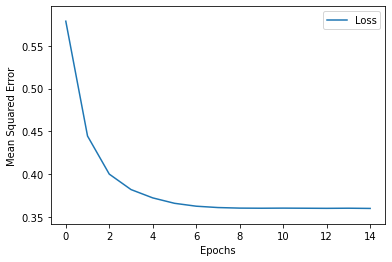


 Evaluate the linear regression model against the test set:
Consider rewriting this model with the Functional API.
3/3 [==============================] - 0s 4ms/step - loss: 0.3954 - mean_squared_error: 0.3954


In [19]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 15
batch_size = 1000
label_name = "median_house_value"

# Establish the model's topography.
my_model = build_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
epochs, mse = train_model(my_model, train_df_norm, epochs, batch_size, label_name)
plot_the_loss_curve(epochs, mse)

test_model(my_model, test_df_norm, batch_size, label_name)

## Define A Deep Neural Net Model

ahora vamos a crear una funcion que cree un modelo con neural network, especificando: el numero de layers y el numero de nodos en cada layer. Además, define la activation function para cada uno

In [62]:
# Es muy parecida a Build_model pero vamos a meter un layer que convierte el linear model a neural net model
def create_model(my_learning_rate, feature_layer):
    
    model = tf.keras.models.Sequential()
    
    model.add(feature_layer)
    
    # Define the first hidden layer with 20 nodes.
    model.add(tf.keras.layers.Dense(units=10,
                                  activation='relu',
                                  name='Hidden1'))
    
    
    
    # Define the second hidden layer with 12 nodes.  
    model.add(tf.keras.layers.Dense(units=6,
                            activation='relu',
                            name='Hidden2'))
    
    # Define the output layer.
    model.add(tf.keras.layers.Dense(units=1,
                                   name='Output'))
    
    model.compile(optimizer= tf.keras.optimizers.Adam(lr=my_learning_rate),
                 loss="mean_squared_error",
                 metrics=[tf.keras.metrics.MeanSquaredError()])
    
    return model

Ahora, la funcion para entrenar el modelo es la misma, no cambia, donde:

 - The keys are the names of each feature (for example, longitude, latitude, and so on).
 - The value of each key is a NumPy array containing the values of that feature.
 
Haciendolo asi le pasas todas las features para que entrene el modelo, pero gracias al feature layer que hemos creado filtra y solo coge los que le hemos dicho ( en este caso: latitudeXlongitude, median_income y population)

Vamos a llamar a los metodos y a hacer pruebas

Epoch 1/30
Consider rewriting this model with the Functional API.


C:\Users\Candel\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Consider rewriting this model with the Functional API.
17/17 [==============================] - 1s 3ms/step - loss: 0.7269 - mean_squared_error: 0.7269
Epoch 2/30
17/17 [==============================] - 0s 3ms/step - loss: 0.4805 - mean_squared_error: 0.4805
Epoch 3/30
17/17 [==============================] - 0s 3ms/step - loss: 0.4196 - mean_squared_error: 0.4196
Epoch 4/30
17/17 [==============================] - 0s 3ms/step - loss: 0.4032 - mean_squared_error: 0.4032
Epoch 5/30
17/17 [==============================] - 0s 3ms/step - loss: 0.3924 - mean_squared_error: 0.3924
Epoch 6/30
17/17 [==============================] - 0s 3ms/step - loss: 0.3879 - mean_squared_error: 0.3879
Epoch 7/30
17/17 [==============================] - 0s 3ms/step - loss: 0.3832 - mean_squared_error: 0.3832
Epoch 8/30
17/17 [==============================] - 0s 3ms/step - loss: 0.3815 - mean_squared_error: 0.3815
Epoch 9/30
17/17 [==============================] - 0s 3ms/step - loss: 0.3768 - mean_square

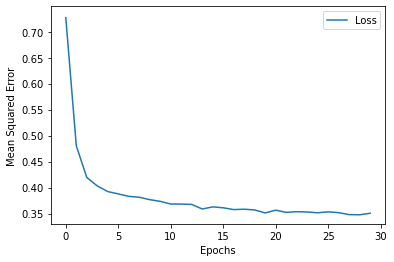


 Evaluate the linear regression model against the test set:
Consider rewriting this model with the Functional API.
3/3 [==============================] - 0s 7ms/step - loss: 0.3781 - mean_squared_error: 0.3781


In [63]:
learning_rate = 0.01
epochs = 30
batch_size = 1000

# Specify the label
label_name = "median_house_value"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined by the feature_layer.
epochs, mse = train_model(my_model, train_df_norm, epochs, batch_size,
                          label_name)
plot_the_loss_curve(epochs, mse)

test_model(my_model, test_df_norm, batch_size, label_name)

Two layers outperformed one layer, but three layers did not perform significantly better than two layers; two layers outperformed one layer. In other words, two layers seemed best. Setting the topography as follows produced reasonably good results with relatively few nodes:
   * 10 nodes in the first layer.
   *  6 nodes in the second layer.

###  Ahora podemos añadir  L1 o L2  o un dropout

Esto porque como podemos ver el modelo esta overfitting el training set entonces seria adecuado poner una de las dos regularizaciones.

In [60]:
def create_model_new(my_learning_rate, my_feature_layer):
  """Create and compile a simple linear regression model."""

  # Discard any pre-existing version of the model.
  model = None

  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(my_feature_layer)

  # Describe the topography of the model. 

  # Implement L2 regularization in the first hidden layer.
  model.add(tf.keras.layers.Dense(units=20, 
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.04),
                                  name='Hidden1'))
  
  # Implement L2 regularization in the second hidden layer.
  model.add(tf.keras.layers.Dense(units=12, 
                                  activation='relu', 
                                  kernel_regularizer=tf.keras.regularizers.l2(0.04),
                                  name='Hidden2'))

  # Define the output layer.
  model.add(tf.keras.layers.Dense(units=1,  
                                  name='Output'))                              
  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model

Como podemos ver no es que estemos metiendo un layer nuevo, sino que en los layers existentes se añade la regularizacion L2 en este caso porque es mas conveniente, pero tambien podria ser la L1 de la misma manera. 

Ahora hacemos una prueba de nuevo para ver que el fallo del train set es mas parecido al del test set que antes, por lo que esta menos overfitted

Epoch 1/30
Consider rewriting this model with the Functional API.


C:\Users\Candel\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Consider rewriting this model with the Functional API.
17/17 [==============================] - 1s 4ms/step - loss: 1.6665 - mean_squared_error: 0.6931
Epoch 2/30
17/17 [==============================] - 0s 5ms/step - loss: 0.6594 - mean_squared_error: 0.4217
Epoch 3/30
17/17 [==============================] - 0s 5ms/step - loss: 0.5164 - mean_squared_error: 0.3914
Epoch 4/30
17/17 [==============================] - 0s 5ms/step - loss: 0.4651 - mean_squared_error: 0.3797
Epoch 5/30
17/17 [==============================] - 0s 4ms/step - loss: 0.4511 - mean_squared_error: 0.3756
Epoch 6/30
17/17 [==============================] - 0s 5ms/step - loss: 0.4415 - mean_squared_error: 0.3734
Epoch 7/30
17/17 [==============================] - 0s 4ms/step - loss: 0.4349 - mean_squared_error: 0.3697
Epoch 8/30
17/17 [==============================] - 0s 5ms/step - loss: 0.4289 - mean_squared_error: 0.3671
Epoch 9/30
17/17 [==============================] - 0s 4ms/step - loss: 0.4250 - mean_square

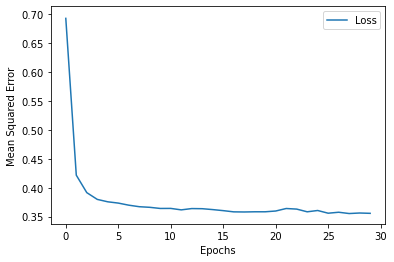


 Evaluate the linear regression model against the test set:
Consider rewriting this model with the Functional API.
3/3 [==============================] - 0s 4ms/step - loss: 0.4362 - mean_squared_error: 0.3905


In [61]:
learning_rate = 0.01
epochs = 30
batch_size = 1000

# Specify the label
label_name = "median_house_value"

# Establish the model's topography.
my_model = create_model_new(learning_rate, my_feature_layer)

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined by the feature_layer.
epochs, mse = train_model(my_model, train_df_norm, epochs, batch_size,
                          label_name)
plot_the_loss_curve(epochs, mse)

test_model(my_model, test_df_norm, batch_size, label_name)

A pesar de esto, sigue estando algo overfitted, no nos vamos a engañar

Si hubieramos querido añadir un dropout lo unico que teniamos que hacer en en la funcion create_model entre hidden layer y hidden layer añadir * model.add(tf.keras.layers.Dropout(rate=0.25)) * y eso reduce el loss tmb(comprobado), mas incluso que L2 en este caso